In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import time
import csv

# MNIST資料集
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.mnist.load_data()

2025-03-19 11:42:27.403877: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-19 11:42:27.450119: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-19 11:42:27.450156: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-19 11:42:27.452080: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-19 11:42:27.462564: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_data.shape

(60000, 28, 28)

In [3]:
test_data.shape

(10000, 28, 28)

## Preprocessing

In [4]:
# 資料攤平
train_data_reshape = train_data.reshape((60000, 28*28)).astype("float32") / 255 # 標準化
test_data_reshape = test_data.reshape((10000, 28*28)).astype("float32") / 255

In [5]:
train_data_reshape.shape

(60000, 784)

In [6]:
test_data_reshape.shape

(10000, 784)

## Train model

In [7]:
# 定義模型
def build_model(hidden_layers, units):
    model = models.Sequential()
    
    # 添加輸入層後的第一個隱藏層
    model.add(layers.Dense(units, activation="relu", input_shape=(784,)))
    # 根據指定的隱藏層數添加額外隱藏層
    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(units, activation="relu"))
    # 輸出層
    model.add(layers.Dense(10, activation="sigmoid"))
    
    # 編譯模型
    model.compile(optimizer="adam",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

## Experiment

### Nodes

In [8]:
# 測試不同節點數
print("\n===== 測試不同節點數之影響 =====")
unit_options = [64, 128, 256, 512]
train_accuracies = []
test_accuracies = []

for units in unit_options:
    print(f"\n節點數: {units}")
    
    model = build_model(hidden_layers=3, units=units)

    # 訓練模型
    model.fit(train_data_reshape, train_labels, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

    # 評估訓練集 accuracy
    train_loss, train_acc = model.evaluate(train_data_reshape, train_labels, verbose=0)
    print(f"訓練集 Accuracy: {train_acc:.4f}")
    train_accuracies.append(train_acc)

    # 評估測試集 accuracy
    test_loss, test_acc = model.evaluate(test_data_reshape, test_labels, verbose=0)
    print(f"測試集 Accuracy: {test_acc:.4f}")
    test_accuracies.append(test_acc)


===== 測試不同節點數之影響 =====

節點數: 64


2025-03-19 11:42:29.849385: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2348] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 9.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
2025-03-19 11:42:29.919679: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2348] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 9.0. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
2025-03-19 11:42:30.263745: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 74088 MB memory:  -> device: 0, name: NVIDIA H100 80GB HBM3, pci bus id: 0000:d1:00.0, compute capability: 9.0
2025-03-19 11:42:32.642068: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6c3ff823d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-03-19 11:42:32.642488: I

訓練集 Accuracy: 0.9884
測試集 Accuracy: 0.9720

節點數: 128
訓練集 Accuracy: 0.9915
測試集 Accuracy: 0.9758

節點數: 256
訓練集 Accuracy: 0.9912
測試集 Accuracy: 0.9760

節點數: 512
訓練集 Accuracy: 0.9926
測試集 Accuracy: 0.9786


### Layers

In [9]:
# 測試不同節點數
print("\n===== 測試不同隱藏層數 =====")
hidden_layer_options = [2, 5, 7]
train_accuracies = []
test_accuracies = []

for layers_count in hidden_layer_options:
    print(f"\n隱藏層數: {layers_count}")
    model = build_model(hidden_layers=layers_count, units=256)  # 節點數固定為 256

    # 訓練模型
    model.fit(train_data_reshape, train_labels, epochs=10, batch_size=128, validation_split=0.2, verbose=0)

    # 評估訓練集 accuracy
    train_loss, train_acc = model.evaluate(train_data_reshape, train_labels, verbose=0)
    print(f"訓練集 Accuracy: {train_acc:.4f}")
    train_accuracies.append(train_acc)

    # 評估測試集 accuracy
    test_loss, test_acc = model.evaluate(test_data_reshape, test_labels, verbose=0)
    print(f"測試集 Accuracy: {test_acc:.4f}")
    test_accuracies.append(test_acc)


===== 測試不同隱藏層數 =====

隱藏層數: 2
訓練集 Accuracy: 0.9924
測試集 Accuracy: 0.9790

隱藏層數: 5
訓練集 Accuracy: 0.9929
測試集 Accuracy: 0.9785

隱藏層數: 7
訓練集 Accuracy: 0.9897
測試集 Accuracy: 0.9770


### Activation functions

In [10]:
# 定義模型函數
def build_model_sigmoid():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(64, activation="sigmoid"),
        layers.Dense(64, activation="sigmoid"),
        layers.Dense(10, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

def build_model_softplus():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(64, activation="softplus"),
        layers.Dense(64, activation="softplus"),
        layers.Dense(10, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

def build_model_relu():
    model = tf.keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(10, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

In [11]:
# 訓練與評估函數
def train_and_evaluate(model, model_name):
    start_time = time.time()
    history = model.fit(train_data, train_labels, epochs=100, batch_size=16, verbose=0, validation_split=0.2)
    end_time = time.time()
    training_time = end_time - start_time

    # 訓練集評估
    train_loss, train_acc = model.evaluate(train_data, train_labels, verbose=0)
    # 測試集評估
    test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=0)

    print(f"\n=== {model_name} ===")
    print(f"訓練時間: {training_time:.2f} 秒")
    print(f"訓練集 Accuracy: {train_acc:.4f}")
    print(f"測試集 Accuracy: {test_acc:.4f}")

    return train_acc, test_acc, training_time

# 訓練三個模型
model_sigmoid = build_model_sigmoid()
train_acc_sigmoid, test_acc_sigmoid, training_time_sigmoid = train_and_evaluate(model_sigmoid, "Sigmoid Model")

model_softplus = build_model_softplus()
train_acc_softplus, test_acc_softplus, training_time_softplus = train_and_evaluate(model_softplus, "Softplus Model")

model_relu = build_model_relu()
train_acc_relu, test_acc_relu, training_time_relu = train_and_evaluate(model_relu, "ReLU Model")


=== Sigmoid Model ===
訓練時間: 509.06 秒
訓練集 Accuracy: 0.9596
測試集 Accuracy: 0.9530

=== Softplus Model ===
訓練時間: 517.84 秒
訓練集 Accuracy: 0.9730
測試集 Accuracy: 0.9532

=== ReLU Model ===
訓練時間: 503.68 秒
訓練集 Accuracy: 0.9763
測試集 Accuracy: 0.9545


### Epochs & Batch sizes

In [12]:
# 設定 epochs 和 batch sizes
epochs_list = [20, 40, 60, 80, 100]
batch_sizes = [64, 128, 256, 512]

train_results = {}  # 儲存訓練集結果
results = {}       # 儲存測試集結果

# 測試不同 epochs 和 batch sizes
for epochs in epochs_list:
    for batch_size in batch_sizes:
        model = build_model(hidden_layers=3, units=64)
        start_time = time.time()
        model.fit(train_data_reshape, train_labels, epochs=epochs, batch_size=batch_size, verbose=0)
        end_time = time.time()
        training_time = end_time - start_time

        # 測試集結果
        test_loss, test_acc = model.evaluate(test_data_reshape, test_labels, verbose=0)
        results[(epochs, batch_size)] = {
            'accuracy': test_acc,
            'training_time': training_time
        }

        # 訓練集結果
        train_loss, train_acc = model.evaluate(train_data_reshape, train_labels, verbose=0)
        train_results[(epochs, batch_size)] = {
            'accuracy': train_acc,
            'training_time': training_time
        }

# # 輸出結果（測試集）
# print("\n=== 測試集結果 ===")
# for (epochs, batch_size), metrics in results.items():
#     print(f"Epochs: {epochs}, Batch Size: {batch_size}, 訓練時間: {metrics['training_time']:.3f} 秒")
#     print(f"  Accuracy: {metrics['accuracy']:.4f}")

# # 輸出結果（訓練集）
# print("\n=== 訓練集結果 ===")
# for (epochs, batch_size), metrics in train_results.items():
#     print(f"Epochs: {epochs}, Batch Size: {batch_size}, 訓練時間: {metrics['training_time']:.3f} 秒")
#     print(f"  Accuracy: {metrics['accuracy']:.4f}")


=== 測試集結果 ===
Epochs: 20, Batch Size: 64, 訓練時間: 40.540 秒
  Accuracy: 0.9755
Epochs: 20, Batch Size: 128, 訓練時間: 19.130 秒
  Accuracy: 0.9737
Epochs: 20, Batch Size: 256, 訓練時間: 11.177 秒
  Accuracy: 0.9726
Epochs: 20, Batch Size: 512, 訓練時間: 6.508 秒
  Accuracy: 0.9743
Epochs: 40, Batch Size: 64, 訓練時間: 72.500 秒
  Accuracy: 0.9727
Epochs: 40, Batch Size: 128, 訓練時間: 37.620 秒
  Accuracy: 0.9755
Epochs: 40, Batch Size: 256, 訓練時間: 20.880 秒
  Accuracy: 0.9773
Epochs: 40, Batch Size: 512, 訓練時間: 11.879 秒
  Accuracy: 0.9740
Epochs: 60, Batch Size: 64, 訓練時間: 106.941 秒
  Accuracy: 0.9772
Epochs: 60, Batch Size: 128, 訓練時間: 55.793 秒
  Accuracy: 0.9793
Epochs: 60, Batch Size: 256, 訓練時間: 30.365 秒
  Accuracy: 0.9755
Epochs: 60, Batch Size: 512, 訓練時間: 17.026 秒
  Accuracy: 0.9760
Epochs: 80, Batch Size: 64, 訓練時間: 141.954 秒
  Accuracy: 0.9783
Epochs: 80, Batch Size: 128, 訓練時間: 73.559 秒
  Accuracy: 0.9786
Epochs: 80, Batch Size: 256, 訓練時間: 39.720 秒
  Accuracy: 0.9775
Epochs: 80, Batch Size: 512, 訓練時間: 21.813 秒

In [13]:
# 將結果儲存到 CSV 
filepath = 'mnist_batch_epoch_analysis.csv'
with open(filepath, 'w', newline='') as csvfile:
    fieldnames = ['Epochs', 'Batch Size', 'Training Time', 'Set', 'Accuracy']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()

    # write 測試集結果
    for (epochs, batch_size), metrics in results.items():
        writer.writerow({
            'Epochs': epochs,
            'Batch Size': batch_size,
            'Training Time': f"{metrics['training_time']:.3f}",
            'Set': 'Test',
            'Accuracy': f"{metrics['accuracy']:.4f}"
        })

    # write 訓練集結果
    for (epochs, batch_size), metrics in train_results.items():
        writer.writerow({
            'Epochs': epochs,
            'Batch Size': batch_size,
            'Training Time': f"{metrics['training_time']:.3f}",
            'Set': 'Train',
            'Accuracy': f"{metrics['accuracy']:.4f}"
        })

print(f"\n結果已保存至 {filepath}")


結果已保存至 mnist_batch_epoch_analysis.csv


In [14]:
# 找出最小 Accuracy 對應的 epochs 和 batch_size
min_acc = float('inf')
min_acc_epochs_batch = None

for (epochs, batch_size), metrics in results.items():
    if metrics['accuracy'] < min_acc:
        min_acc = metrics['accuracy']
        min_acc_epochs_batch = (epochs, batch_size)

print("\nMinimum Accuracy:")
print(f"  Epochs: {min_acc_epochs_batch[0]}, Batch Size: {min_acc_epochs_batch[1]}, Accuracy: {min_acc:.4f}")


Minimum Accuracy:
  Epochs: 20, Batch Size: 256, Accuracy: 0.9726


### Figures

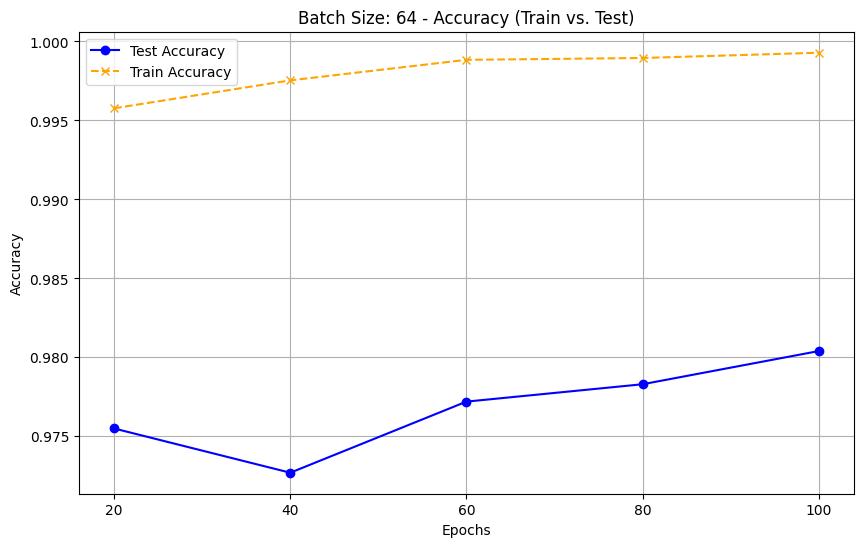

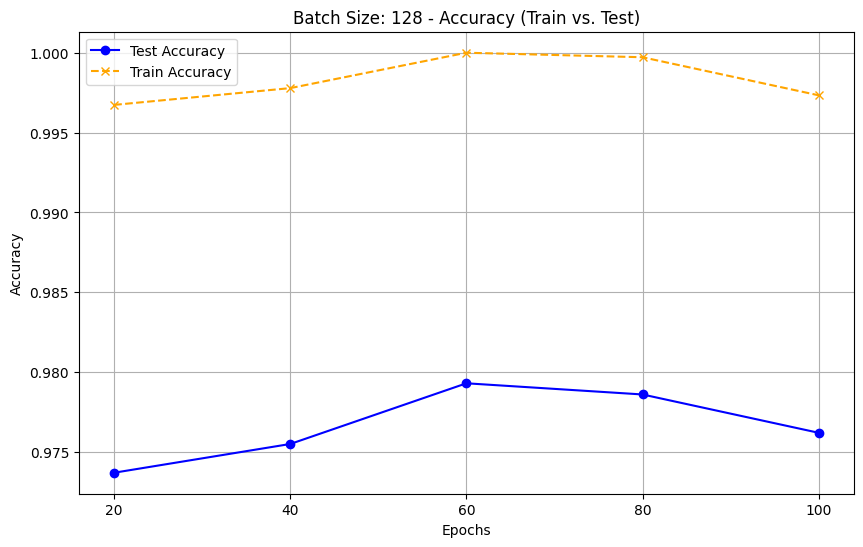

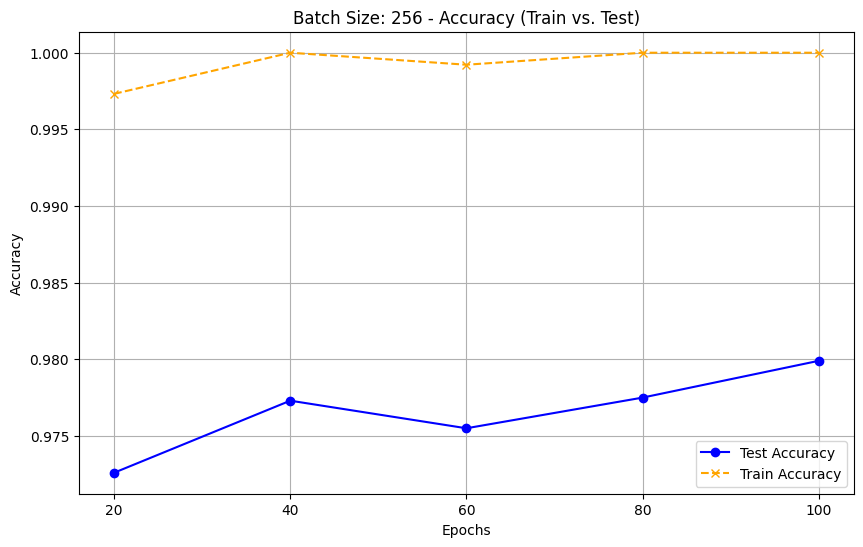

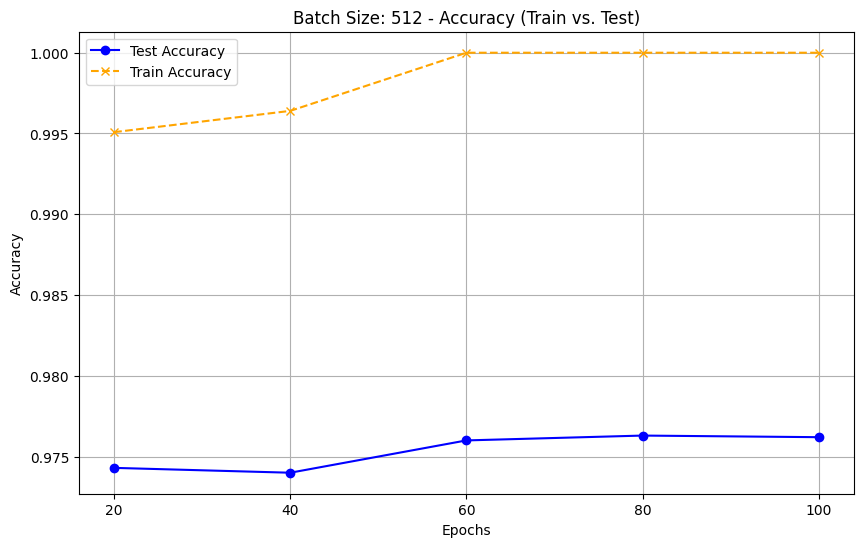

In [15]:
# 按 batch size 整理 Train 和 Test 的 Accuracy 數據
metrics_by_batch_size = {
    batch_size: {
        'train_acc': [],
        'test_acc': []
    }
    for batch_size in batch_sizes
}

for epochs in epochs_list:
    for batch_size in batch_sizes:
        train_metrics = train_results[(epochs, batch_size)]
        test_metrics = results[(epochs, batch_size)]
        metrics_by_batch_size[batch_size]['train_acc'].append(train_metrics['accuracy'])
        metrics_by_batch_size[batch_size]['test_acc'].append(test_metrics['accuracy'])

# 繪製圖表（按 batch size 分開）
for batch_size in batch_sizes:
    plt.figure(figsize=(10, 6))
    plt.plot(epochs_list, metrics_by_batch_size[batch_size]['test_acc'], marker='o', label='Test Accuracy', color='blue')
    plt.plot(epochs_list, metrics_by_batch_size[batch_size]['train_acc'], marker='x', linestyle='--', label='Train Accuracy', color='orange')

    plt.title(f'Batch Size: {batch_size} - Accuracy (Train vs. Test)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xticks(epochs_list)
    plt.legend()
    plt.grid(True)
    plt.show()